In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [77]:
file_path = "C:/Users/madhu/Downloads/Airbnb/Airbnb Data/Listings.csv"  # Update this to your actual file path if different
df = pd.read_csv(file_path, encoding='latin1')
df.head()

C:\Users\madhu\AppData\Local\Temp\ipykernel_5084\75438411.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [78]:
# Count of listings per city
city_count = df['city'].value_counts()

# Count of different property types
property_type_count = df['property_type'].value_counts()

# Count of listings that are instant bookable
instant_bookable_count = df['instant_bookable'].value_counts()

# Display the counts
city_count.head(), property_type_count.head(), instant_bookable_count


(Paris             64690
 New York          37012
 Sydney            33630
 Rome              27647
 Rio de Janeiro    26615
 Name: city, dtype: int64,
 Entire apartment             138989
 Private room in apartment     47322
 Private room in house         13292
 Entire house                  13273
 Entire condominium            11250
 Name: property_type, dtype: int64,
 f    164105
 t    115607
 Name: instant_bookable, dtype: int64)

In [79]:
# Extracting host_since as a datetime column
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Trends in the number of listings over time
listings_over_time = df['host_since'].dt.year.value_counts().sort_index()

# Price trends for different property types
price_trends_property_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)

listings_over_time, price_trends_property_type

(2008.0       65
 2009.0      461
 2010.0     2150
 2011.0     6966
 2012.0    16066
 2013.0    25453
 2014.0    37650
 2015.0    44886
 2016.0    42402
 2017.0    26553
 2018.0    27020
 2019.0    31447
 2020.0    17220
 2021.0     1208
 Name: host_since, dtype: int64,
 property_type
 Entire villa                    9180.302387
 Room in heritage hotel          4850.000000
 Boat                            4730.202899
 Shared room in parking space    4496.000000
 Private room in castle          3735.625000
                                    ...     
 Private room in train             71.500000
 Holiday park                      71.000000
 Private room in bus               50.000000
 Shared room in farm stay          45.000000
 Shared room in tent               20.000000
 Name: price, Length: 144, dtype: float64)

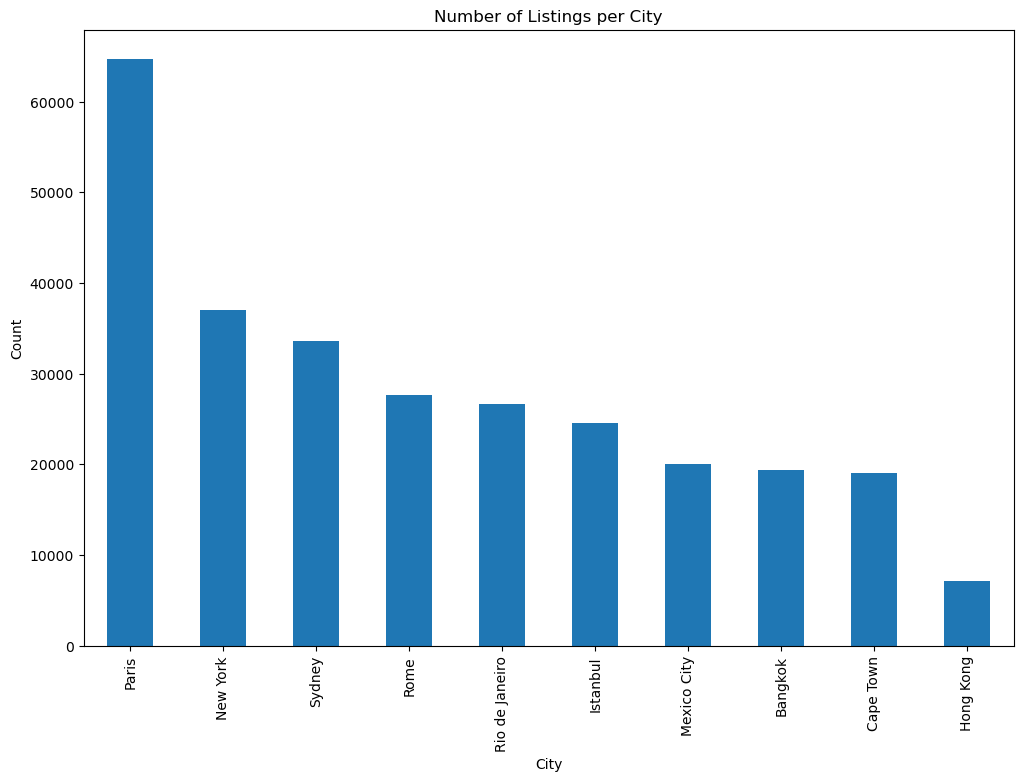

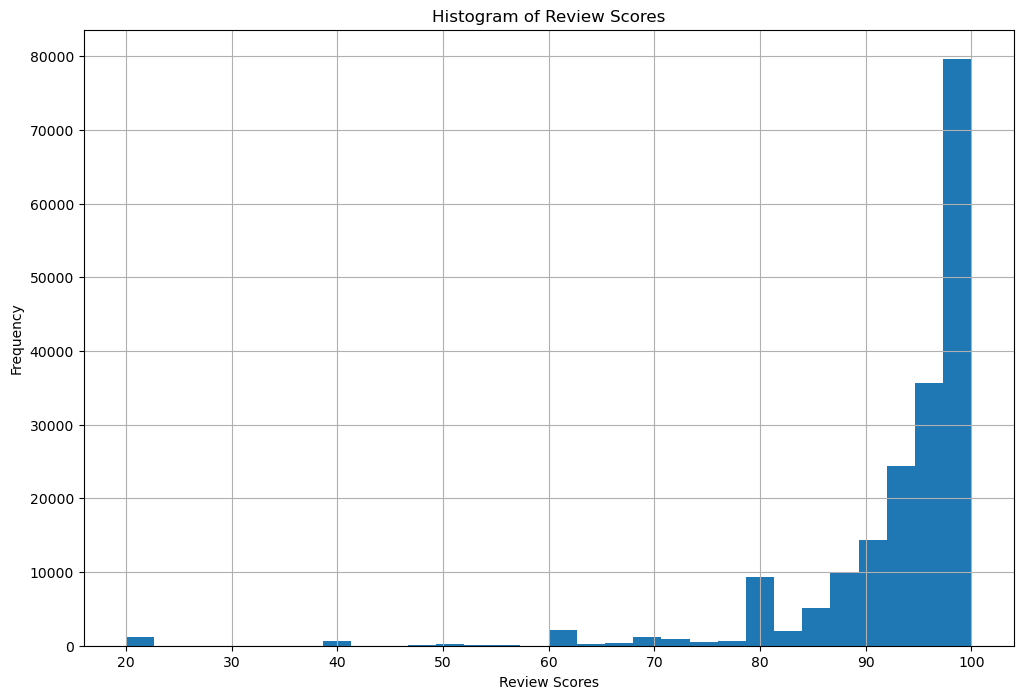

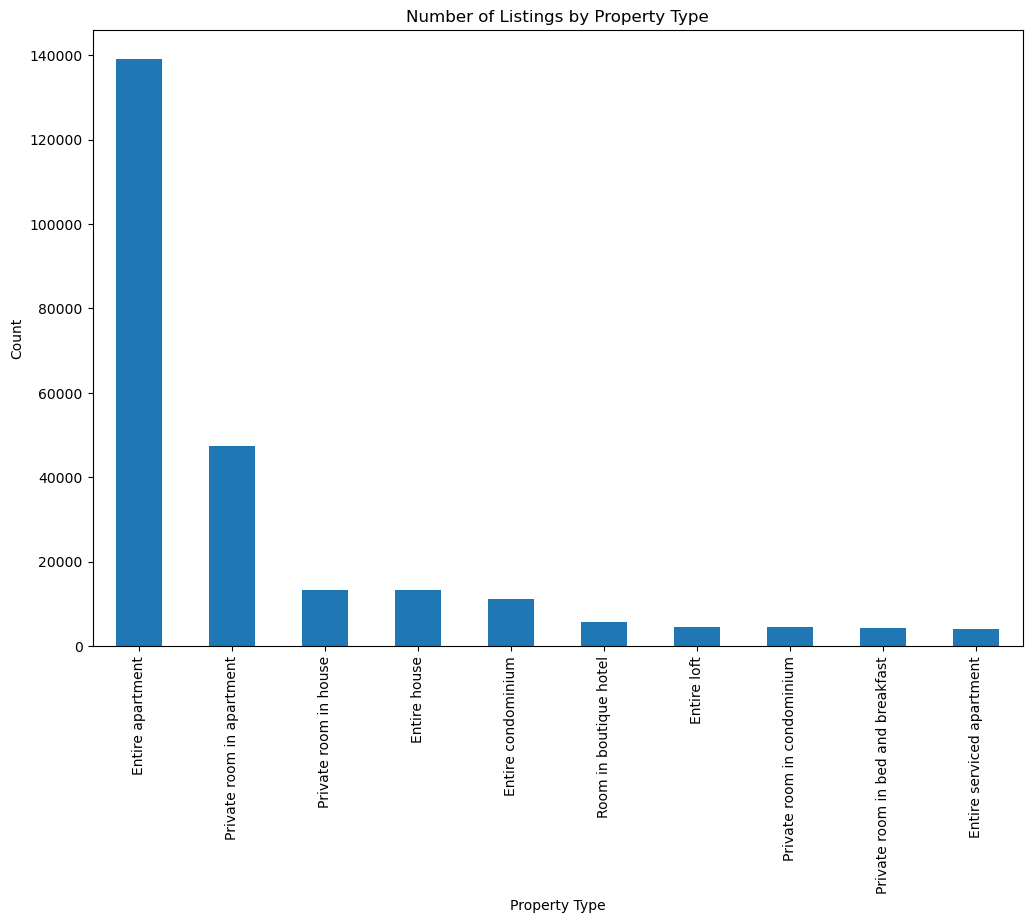

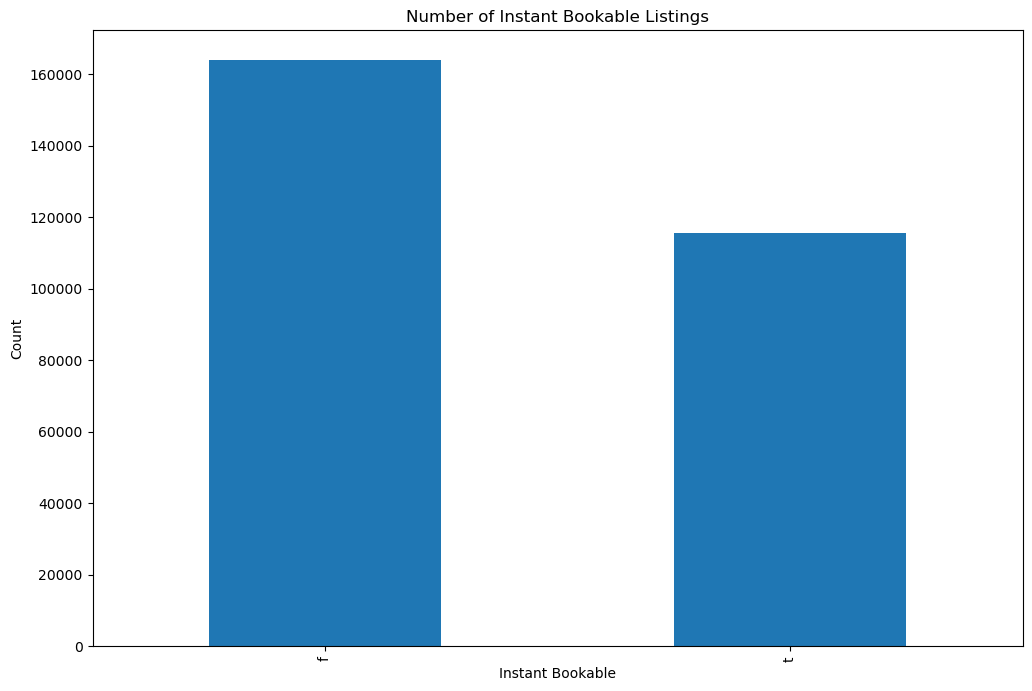

In [80]:
# Bar plot of number of listings per city
plt.figure(figsize=(12, 8))
city_count.head(20).plot(kind='bar')
plt.title('Number of Listings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# Histogram of review scores
plt.figure(figsize=(12, 8))
df['review_scores_rating'].dropna().hist(bins=30)
plt.title('Histogram of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.show()

# Bar plot of number of listings by property type
plt.figure(figsize=(12, 8))
property_type_count.head(10).plot(kind='bar')
plt.title('Number of Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

# Bar plot of instant bookable listings
plt.figure(figsize=(12, 8))
instant_bookable_count.plot(kind='bar')
plt.title('Number of Instant Bookable Listings')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.show()


In [81]:
# Average review scores by room type
avg_review_by_room_type = df.groupby('room_type')['review_scores_rating'].mean()

# Average number of bedrooms by property type
avg_bedrooms_by_property_type = df.groupby('property_type')['bedrooms'].mean()

avg_review_by_room_type, avg_bedrooms_by_property_type


(room_type
 Entire place    93.735500
 Hotel room      90.666578
 Private room    92.836126
 Shared room     91.240558
 Name: review_scores_rating, dtype: float64,
 property_type
 Barn         2.400
 Boat         2.100
 Bus          1.000
 Camper/RV    1.275
 Campsite     2.625
              ...  
 Tipi         3.000
 Train        1.000
 Treehouse    1.000
 Windmill       NaN
 Yurt         5.500
 Name: bedrooms, Length: 144, dtype: float64)

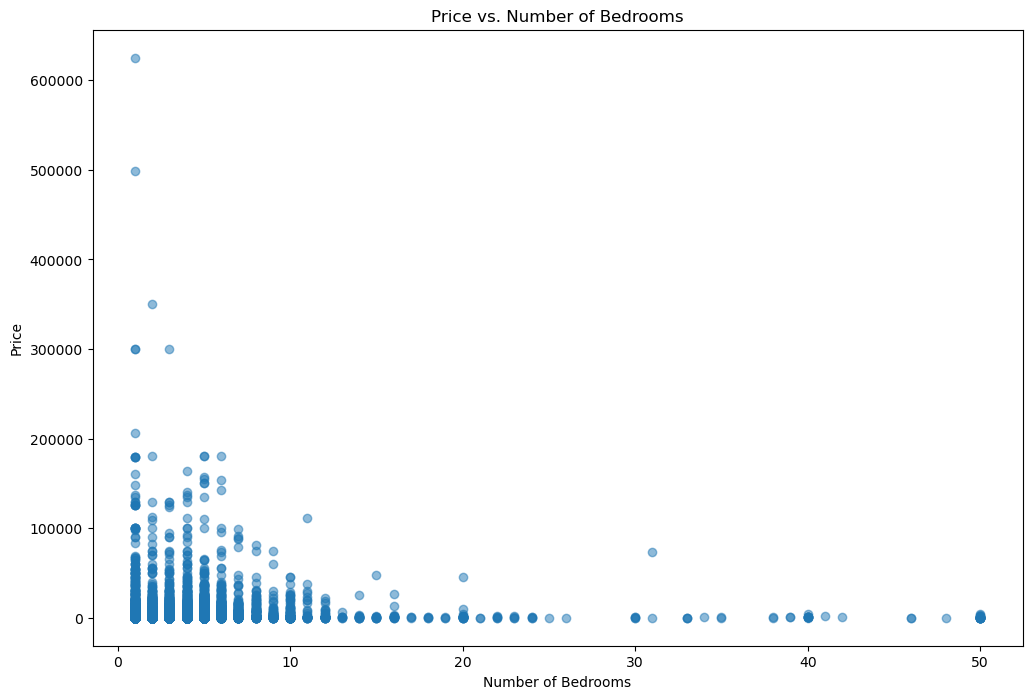

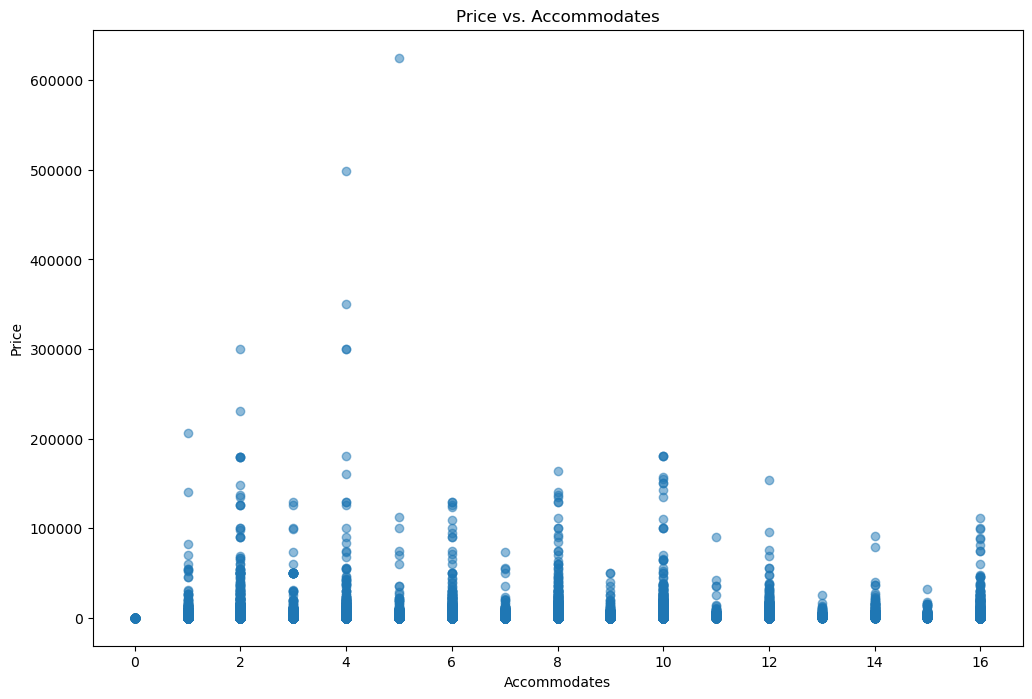

In [82]:
# Scatterplot of price vs. number of bedrooms
plt.figure(figsize=(12, 8))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Scatterplot of price vs. accommodates
plt.figure(figsize=(12, 8))
plt.scatter(df['accommodates'], df['price'], alpha=0.5)
plt.title('Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()


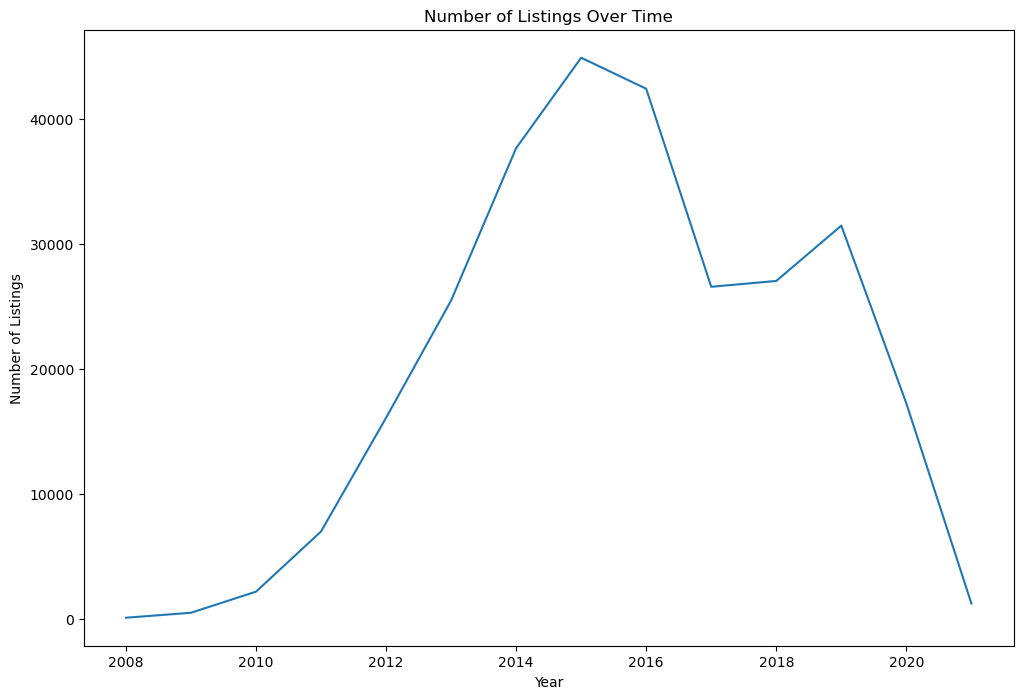

In [83]:
plt.figure(figsize=(12, 8))
listings_over_time.plot()
plt.title('Number of Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()

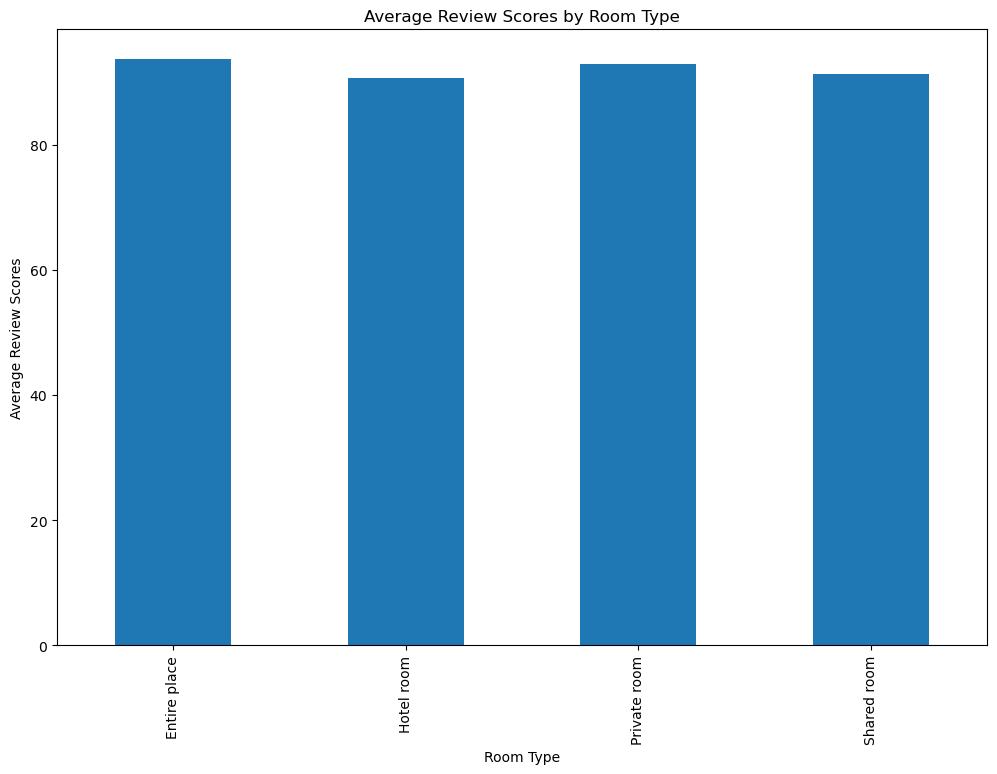

In [85]:
# Calculate average review scores by room type
avg_review_by_room_type = df.groupby('room_type')['review_scores_rating'].mean()

import matplotlib.pyplot as plt

# Plotting the average review scores by room type
plt.figure(figsize=(12, 8))
avg_review_by_room_type.plot(kind='bar')
plt.title('Average Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Review Scores')
plt.show()


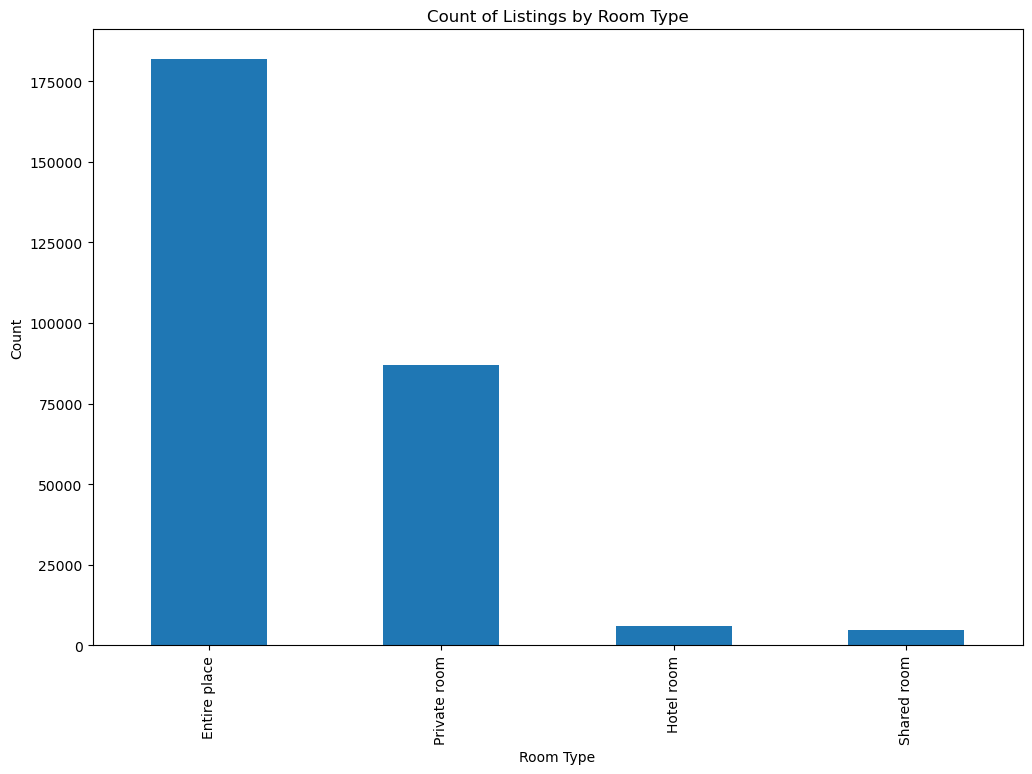

In [86]:
# Calculate the count of listings for each room type
count_by_room_type = df['room_type'].value_counts()

# Plotting the count of listings for each room type
plt.figure(figsize=(12, 8))
count_by_room_type.plot(kind='bar')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


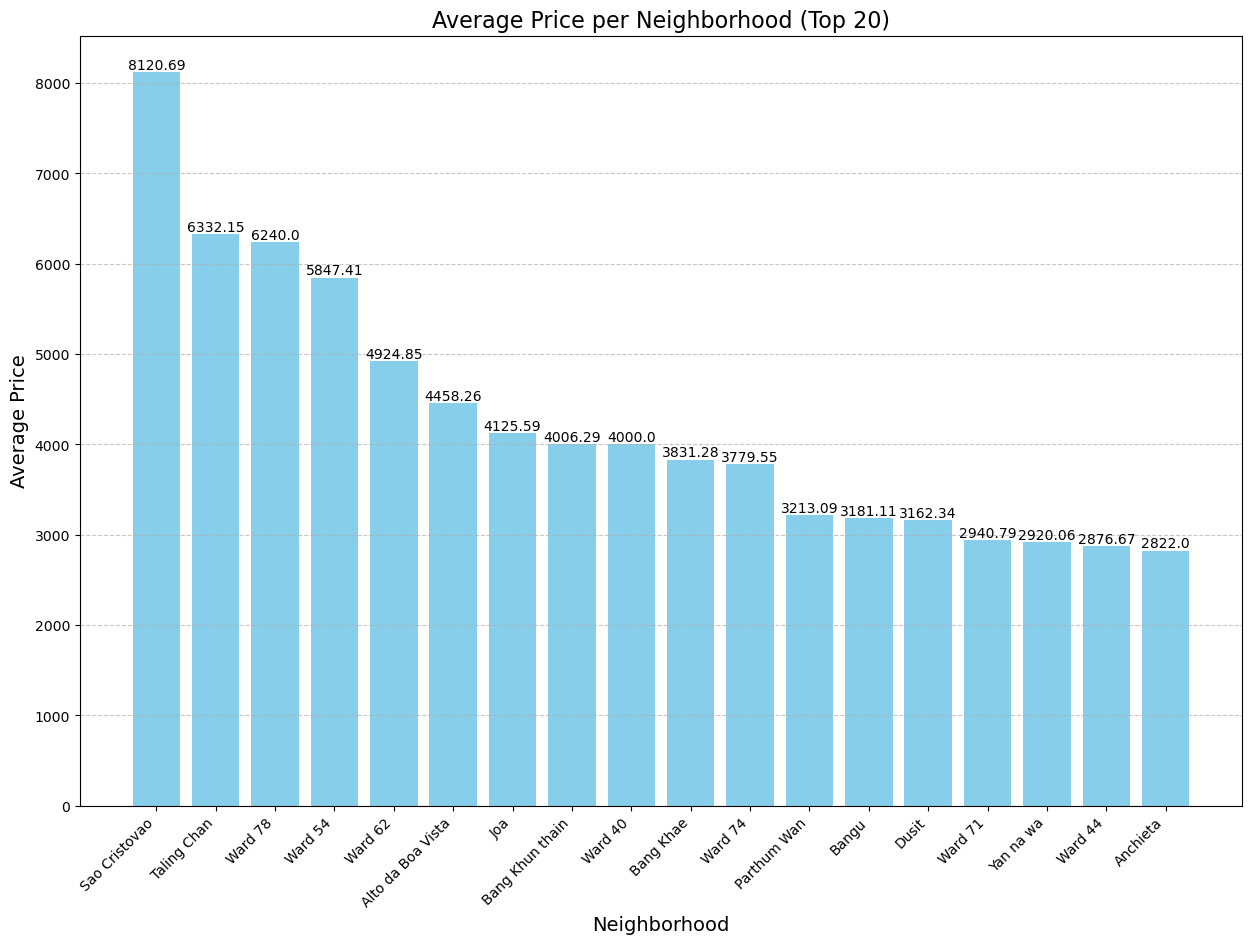

In [96]:
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

top_n = 18
top_avg_price_by_neighborhood = avg_price_by_neighborhood.head(top_n)

# Plotting the improved average price per neighborhood
plt.figure(figsize=(15, 10))
bars = plt.bar(top_avg_price_by_neighborhood.index, top_avg_price_by_neighborhood.values, color='skyblue')

plt.xticks(rotation=45, ha='right')

plt.title('Average Price per Neighborhood (Top 20)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10, color='black')

plt.show()


<Figure size 1500x1000 with 0 Axes>

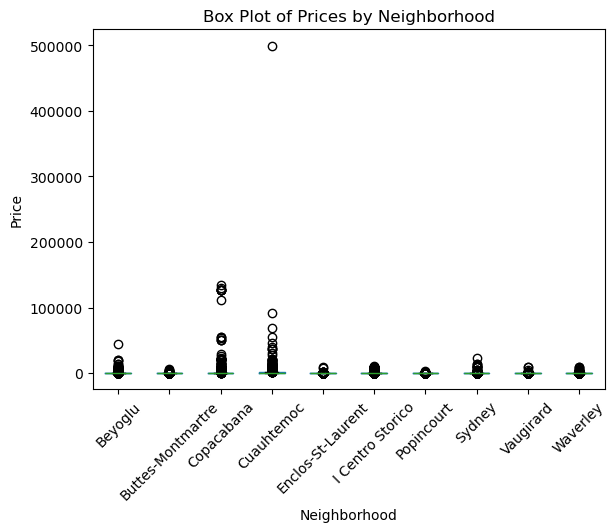

In [97]:
top_neighborhoods = df['neighbourhood'].value_counts().head(10).index
subset_df = df[df['neighbourhood'].isin(top_neighborhoods)]

# Plotting the box plot
plt.figure(figsize=(15, 10))
subset_df.boxplot(column='price', by='neighbourhood', grid=False)
plt.title('Box Plot of Prices by Neighborhood')
plt.suptitle('')  # Suppress the automatic title to keep it clean
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

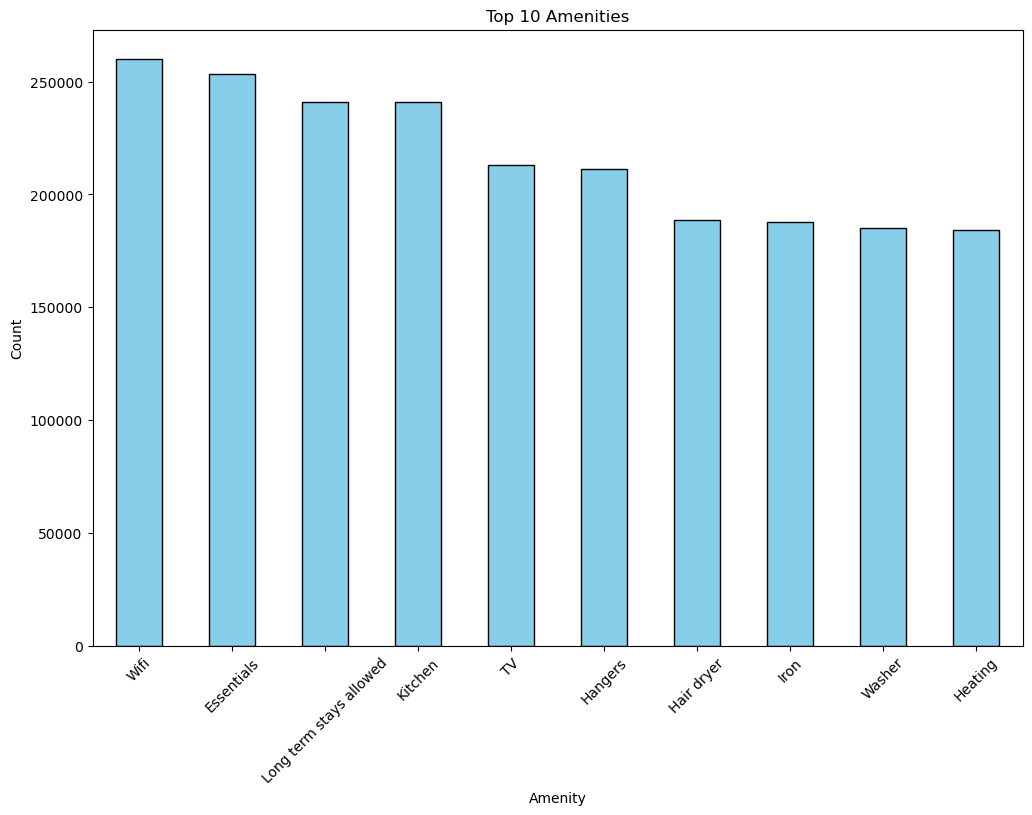

In [101]:
all_amenities = df['amenities'].dropna().apply(lambda x: ast.literal_eval(x))
amenities_list = [item for sublist in all_amenities for item in sublist]
amenities_count = pd.Series(amenities_list).value_counts().head(10)

# Plotting the bar plot of top 10 amenities
plt.figure(figsize=(12, 8))
amenities_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


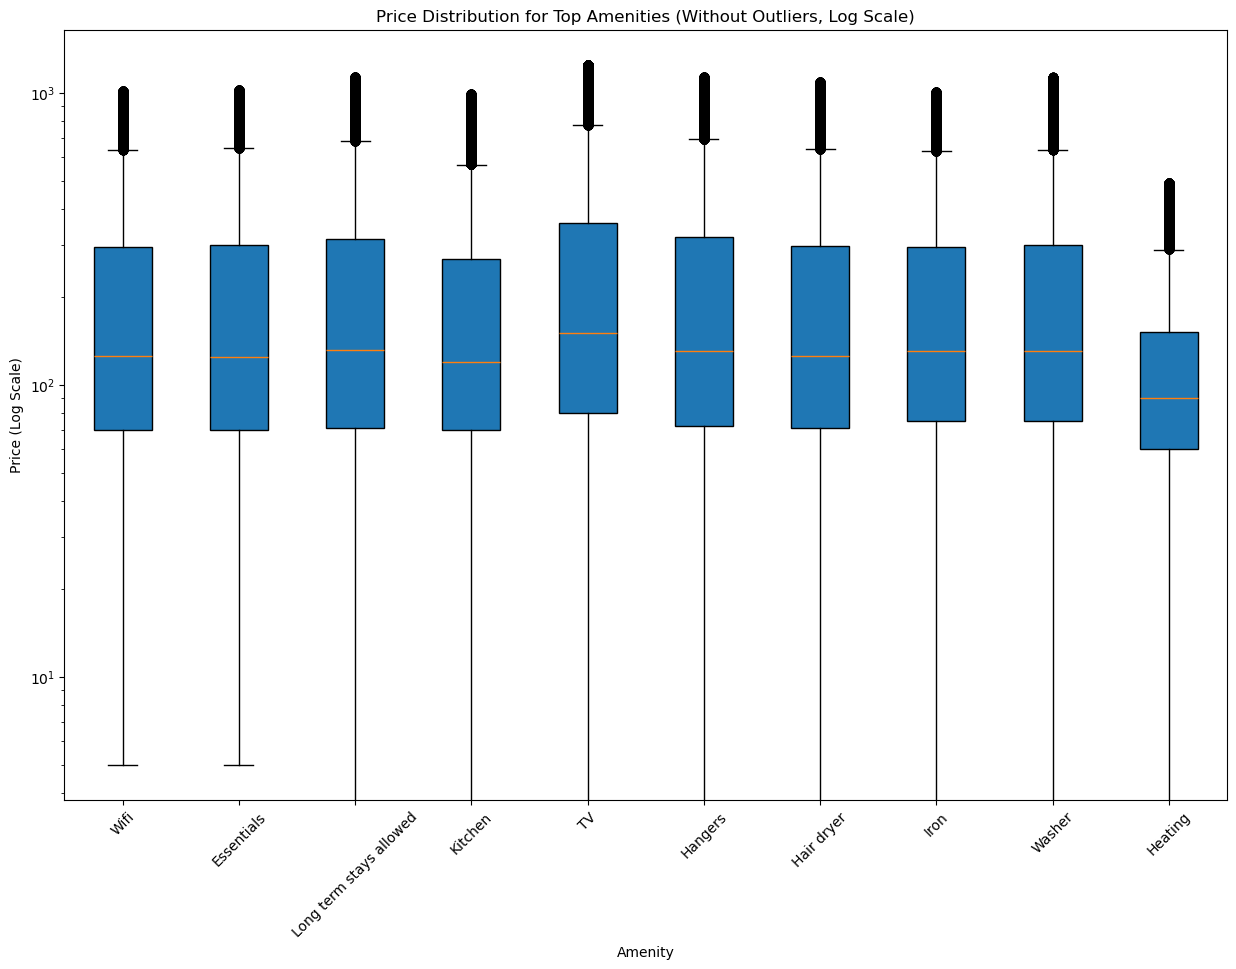

In [107]:
import numpy as np

# Remove outliers for a clearer view
def remove_outliers(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]
cleaned_amenity_price_data = {amenity: remove_outliers(prices) for amenity, prices in amenity_price_data.items()}

plt.figure(figsize=(15, 10))

plt.boxplot(cleaned_amenity_price_data.values(), labels=cleaned_amenity_price_data.keys(), patch_artist=True)

# logarithmic scale
plt.yscale('log')

plt.title('Price Distribution for Top Amenities (Without Outliers, Log Scale)')
plt.xlabel('Amenity')
plt.ylabel('Price (Log Scale)')
plt.xticks(rotation=45)


plt.show()


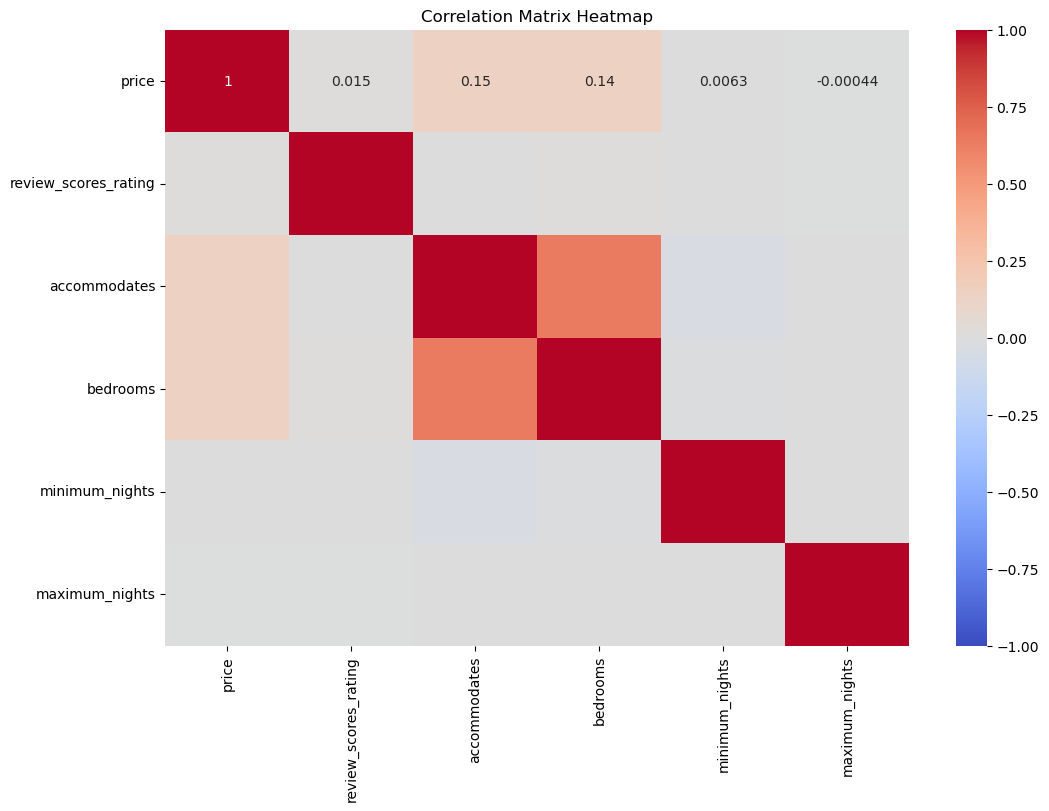

                         price  review_scores_rating  accommodates  bedrooms  \
price                 1.000000              0.015048      0.146327  0.143307   
review_scores_rating  0.015048              1.000000      0.006420  0.009007   
accommodates          0.146327              0.006420      1.000000  0.639102   
bedrooms              0.143307              0.009007      0.639102  1.000000   
minimum_nights        0.006344              0.000143     -0.033442 -0.010582   
maximum_nights       -0.000442             -0.002795      0.003241  0.000872   

                      minimum_nights  maximum_nights  
price                       0.006344       -0.000442  
review_scores_rating        0.000143       -0.002795  
accommodates               -0.033442        0.003241  
bedrooms                   -0.010582        0.000872  
minimum_nights              1.000000        0.000248  
maximum_nights              0.000248        1.000000  


In [106]:
continuous_vars = ['price', 'review_scores_rating', 'accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights']
correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()
print(correlation_matrix)


In [109]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [111]:
df['year_month'] = df['host_since'].dt.to_period('M')

monthly_avg_price = df.groupby('year_month')['price'].mean()


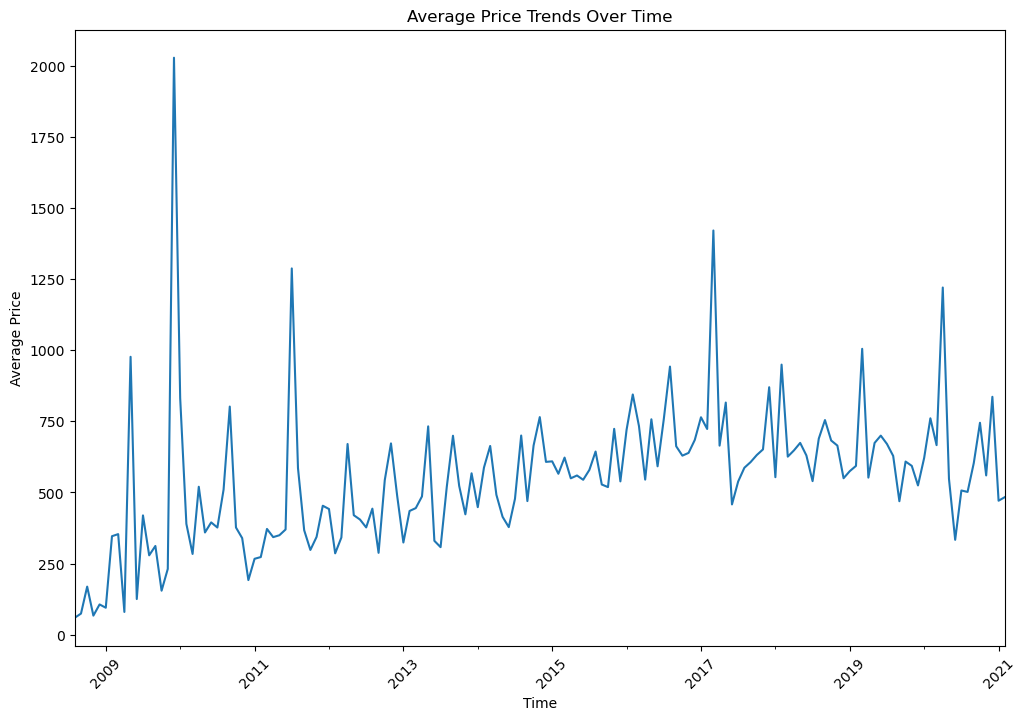

In [112]:
plt.figure(figsize=(12, 8))
monthly_avg_price.plot()
plt.title('Average Price Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Based on the exploratory data analysis, here are some key insights:

1. **Listings Distribution**: Paris has the highest number of listings, followed by New York and Sydney. This indicates a higher demand and supply of Airbnb accommodations in these cities.

2. **Property Types**: Entire apartments are the most common property type, significantly more than private rooms in apartments and houses.

3. **Instant Bookable Listings**: There is a significant number of listings that are instant bookable, which is a popular feature among guests.

4. **Trends Over Time**: The number of listings has been increasing over the years, with a peak around 2015-2016. There was a noticeable drop in 2020, likely due to the COVID-19 pandemic.

5. **Price Trends**: Entire villas and unique properties like heritage hotels and boats tend to have higher average prices. Shared rooms and less conventional listings have lower average prices.

6. **Review Scores**: Entire places and private rooms have higher average review scores compared to shared rooms and hotel rooms.

7. **Price Relationships**: There is a positive correlation between the number of bedrooms/accommodates and the price, indicating that larger listings tend to be more expensive.

8. **Correlation Analysis**: The correlation matrix shows that price is weakly correlated with review scores but has a stronger relationship with the number of bedrooms and accommodates.
